In [1]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
import matplotlib.pyplot as plt

Play Audio

In [2]:
dataExtraction = "[-246.18222     175.60677      12.49137      40.05228      21.66619 7.517791     21.423012     23.524088      8.622603      6.903171 3.5913472     0.28920713    1.5519654 ]"
dataExtraction = np.fromstring(dataExtraction.strip('[]'), dtype=float, sep=' ')
print(type(dataExtraction))
print(dataExtraction)

<class 'numpy.ndarray'>
[-246.18222     175.60677      12.49137      40.05228      21.66619
    7.517791     21.423012     23.524088      8.622603      6.903171
    3.5913472     0.28920713    1.5519654 ]


Get Audio Information

In [3]:
filename = "c:/coding/darbukaToneIdentification/static/dataset/tonePattern/baladi2_1.wav"
sample_rate, samples = wavfile.read(filename)
print("Sample rate: {0} Hz".format(sample_rate))
print("Samples : {0}".format(len(samples)))
print("Audio duration: {0} second".format(len(samples) / sample_rate))

Sample rate: 44100 Hz
Samples : 172827
Audio duration: 3.9189795918367345 second


In [12]:
import librosa
import librosa.feature

audio,_ = librosa.load(filename, sample_rate)
print(type(audio))
windowLength = int(0.02*sample_rate)
frameLength = int(0.01*sample_rate)
mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13, n_fft=windowLength, hop_length=frameLength)
mfcc_flat = np.mean(mfcc, axis=1)
print(mfcc_flat)

<class 'numpy.ndarray'>
[-318.01486    124.37727      3.9942262    9.9483385    4.2001977
    0.8205042    3.9605258    6.923449     3.8374546    4.7869897
    4.5855513    3.9511585   -0.6964205]


C:\Users\HAIRUL~1\AppData\Local\Temp/ipykernel_14660/2592054346.py:4: FutureWarning:

Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error



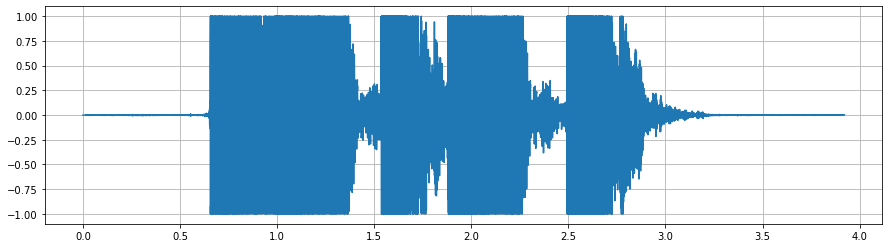

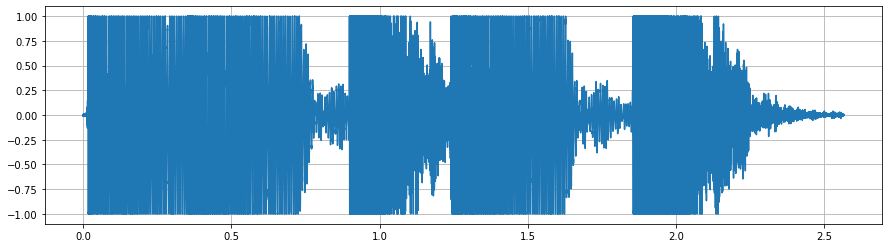

In [14]:
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

audioTrim,_ = librosa.effects.trim(audio, top_db=40)

plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audioTrim) / sample_rate, num=len(audioTrim)), audioTrim)
plt.grid(True)

In [6]:
onsetDetection = librosa.onset.onset_detect(audioTrim, sr=sample_rate, units='time')
print(type(onsetDetection))
# onsetDetection = onsetDetection.tolist()

while len(onsetDetection) > 5 :
  onsetDetection = np.delete(onsetDetection, 0)
print(onsetDetection)

<class 'numpy.ndarray'>
[0.03482993 0.3599093  0.90557823 1.25387755 1.86920635]


C:\Users\HAIRUL~1\AppData\Local\Temp/ipykernel_14660/1266983998.py:1: FutureWarning: Pass y=[-0.00788879 -0.00727844 -0.00679016 ...  0.02761841  0.03082275
  0.03334045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onsetDetection = librosa.onset.onset_detect(audioTrim, sr=sample_rate, units='time')


Cut Audio

In [7]:
from pydub import AudioSegment

newAudio = AudioSegment.from_wav(filename)
newAudio = newAudio[1000:2000]
# newAudio.export('newSong.wav', format="wav")

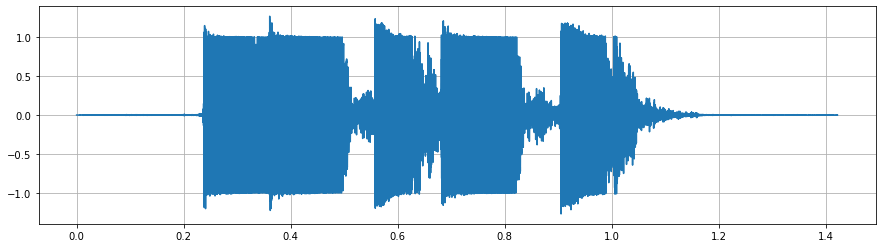

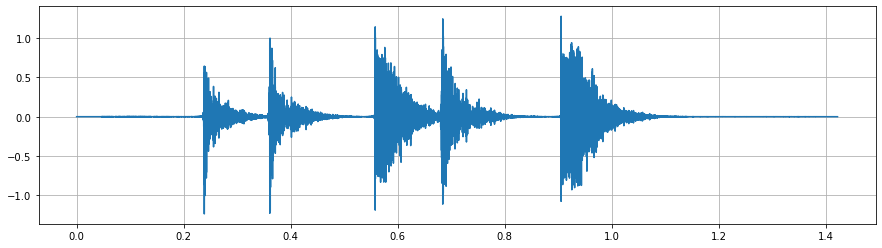

In [8]:
import librosa.display
from scipy import signal
from IPython.display import Audio, IFrame, display

audio,sr = librosa.load(filename, mono=True, sr=16000, offset=0, duration=10)

def f_high(y,sr):
  b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
  yf = signal.lfilter(b,a,y)
  return yf

plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

audio = f_high(audio, sr)

plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

# display(Audio(audio,rate=sr))
# audio.export('file.wav', format="wav")

In [9]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# buat 100 data
X, y = make_moons(noise=0.3, random_state=0)
# pecah data 3:1 X,y
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(
    data=[
        go.Scatter(
            x=X[y==label, 0],
            y=X[y==label, 1],
            name=f'{split} Split, Label {label}',
            mode='markers',
            marker_symbol=marker
        )
        for X, y, label, split, marker in trace_specs
    ]
)

fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.show()